In [68]:
import os
import numpy as np
import tensorflow as tf
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [70]:

#  Define paths
model_path = os.path.join("../results", "lstm_model_fixed.keras")  
scaler_path = os.path.join("../results", "scaler.pkl")

In [72]:
#  Load the trained model
try:
    
    model = tf.keras.models.load_model(model_path)
    print(" Model loaded successfully!")
except Exception as e:
    print(f" Error loading model: {e}")


 Model loaded successfully!


In [74]:

# Load the scaler
try:
    scaler = joblib.load(scaler_path)
    print("Scaler loaded successfully!")
except Exception as e:
    print(f" Error loading scaler: {e}")

Scaler loaded successfully!


In [76]:

# Load test data
X_test = np.load("../data/X_test.npy")
y_test = np.load("../data/y_test.npy")

In [78]:

# Generate predictions
y_pred = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [80]:

# Inverse transform predictions & actual values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

In [82]:

# Calculate Model Evaluation Metrics
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_pred_actual)

In [84]:

print(f" Mean Squared Error (MSE): {mse}")
print(f" Root Mean Squared Error (RMSE): {rmse}")
print(f" Mean Absolute Error (MAE): {mae}")

 Mean Squared Error (MSE): 3753.8690004458163
 Root Mean Squared Error (RMSE): 61.26882568195523
 Mean Absolute Error (MAE): 44.11808127674939


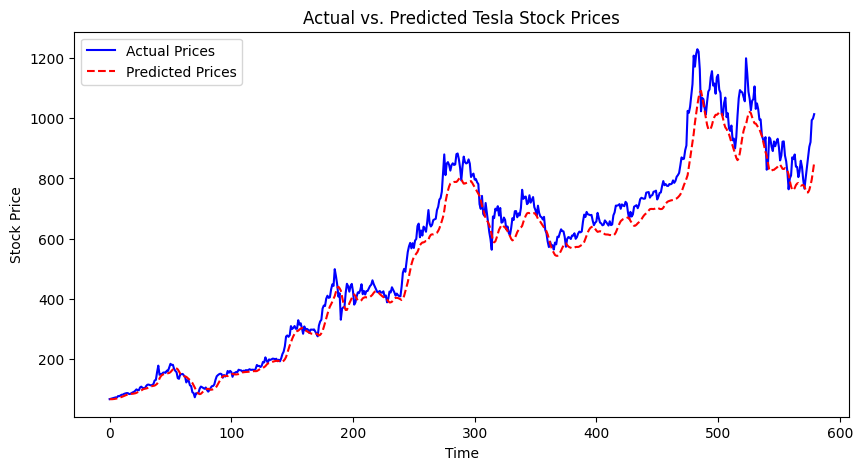

 Plot saved successfully at: ../results/actual_vs_predicted.png


In [86]:
#  Actual vs. Predicted Prices
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label="Actual Prices", color='blue')
plt.plot(y_pred_actual, label="Predicted Prices", color='red', linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Actual vs. Predicted Tesla Stock Prices")
plt.legend()

#  Save the plot
plot_path = "../results/actual_vs_predicted.png"
plt.savefig(plot_path)
plt.show()

print(f" Plot saved successfully at: {plot_path}")


## Key Observation
The predicted prices follow the actual stock price trend but may still have some deviations.
1. The error metrics are reasonable, but further tuning can improve performance.
2. More features (like moving averages or market sentiment data) could enhance accuracy.